# Lab | Data Cleaning and Formatting

In this lab, we will be working with the customer data from an insurance company, which can be found in the CSV file located at the following link: https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv


# Challenge 1: Data Cleaning and Formatting

## Exercise 1: Cleaning Column Names

To ensure consistency and ease of use, standardize the column names of the dataframe. Start by taking a first look at the dataframe and identifying any column names that need to be modified. Use appropriate naming conventions and make sure that column names are descriptive and informative.

*Hint*:
- *Column names should be in lower case*
- *White spaces in column names should be replaced by `_`*
- *`st` could be replaced for `state`*

In [1]:
# Your code here
import pandas as pd


url="https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv"
dataFrame = pd.read_csv(url)
dataFrame.head()

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


In [2]:
#change names to lower case
dataFrame.columns = [col.lower() for col in dataFrame.columns]
dataFrame

,customer,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#rename some of the columns
dataFrame.columns

Index(['customer', 'st', 'gender', 'education', 'customer lifetime value',
       'income', 'monthly premium auto', 'number of open complaints',
       'policy type', 'vehicle class', 'total claim amount'],
      dtype='object')

In [4]:
new_column_names = ['customer_id', 'state', 'gender', 'education', 'customer_life_time_value','income', 'monthly_premium', 'open_complaints','policy_type', 'vehicle_class', 'total_claim']
dataFrame.columns = new_column_names
dataFrame.head()

,customer_id,state,gender,education,customer_life_time_value,income,monthly_premium,open_complaints,policy_type,vehicle_class,total_claim
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


## Exercise 2: Cleaning invalid Values

The dataset contains columns with inconsistent and incorrect values that could affect the accuracy of our analysis. Therefore, we need to clean these columns to ensure that they only contain valid data.

Note that this exercise will focus only on cleaning inconsistent values and will not involve handling null values (NaN or None).

*Hint*:
- *Gender column contains various inconsistent values such as "F", "M", "Femal", "Male", "female", which need to be standardized, for example, to "M" and "F".*
- *State abbreviations be can replaced with its full name, for example "AZ": "Arizona", "Cali": "California", "WA": "Washington"*
- *In education, "Bachelors" could be replaced by "Bachelor"*
- *In Customer Lifetime Value, delete the `%` character*
- *In vehicle class, "Sports Car", "Luxury SUV" and "Luxury Car" could be replaced by "Luxury"*

In [5]:
dataFrame["gender"].unique()

array([nan, 'F', 'M', 'Femal', 'Male', 'female'], dtype=object)

In [6]:
# Your code here
#first we change everything to uppercase
dataFrame["gender"] = dataFrame["gender"].str.upper()
dataFrame["gender"].value_counts()

F         457
M         413
MALE       39
FEMALE     28
FEMAL      17
Name: gender, dtype: int64

In [7]:

#we can make a function that changes the values we want
def clean(x):
    if x in ['M', 'MALE']:
        return 'M'
    elif x in ['F', 'FEMALE', "FEMAL"]:
        return 'F'
    else:
        return 'U'
    

dataFrame['gender'] = list(map(clean, dataFrame['gender']))
dataFrame['gender'].unique()  # To check the results again
dataFrame["gender"].value_counts()

U    3054
F     502
M     452
Name: gender, dtype: int64

In [8]:
# State abbreviations be can replaced with its full name, for example "AZ": "Arizona", "Cali": "California", "WA": "Washington"
dataFrame["state"].unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon', 'Cali',
       'AZ', 'WA', nan], dtype=object)

In [9]:
#doing a dictionary with the replacements,so in the left is the old one and in the right the new one, i had to put a extra one cuz i had a typo error
state_replacements = {
    "AZ" : "Arizona",
    "Cali" : "California",
    "WA" : "Washington",
    "Washinton" : "Washington"
}

# Replacing the abreviations
dataFrame["state"] = dataFrame["state"].replace(state_replacements)
dataFrame["state"].unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon', nan],
      dtype=object)

In [10]:
# In education, "Bachelors" could be replaced by "Bachelor"
dataFrame["education"].unique()

array(['Master', 'Bachelor', 'High School or Below', 'College',
       'Bachelors', 'Doctor', nan], dtype=object)

In [11]:

dataFrame["education"] = dataFrame["education"].replace("Bachelors","Bachelor")
dataFrame["education"].unique()

array(['Master', 'Bachelor', 'High School or Below', 'College', 'Doctor',
       nan], dtype=object)

In [12]:
# In Customer Lifetime Value, delete the % character
#firs i need to know what type is 
dataFrame["customer_life_time_value"].dtype
#seems to be a object which in panda is treated as a string also ,so we can just remove it with rstrip() function and then make it be a float

dtype('O')

In [13]:
dataFrame["customer_life_time_value"] = dataFrame["customer_life_time_value"].str.rstrip("%").astype(float)
dataFrame.head()

,customer_id,state,gender,education,customer_life_time_value,income,monthly_premium,open_complaints,policy_type,vehicle_class,total_claim
0,RB50392,Washington,U,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


In [14]:
#divide it with 100 for a better representation
dataFrame["customer_life_time_value"] = dataFrame["customer_life_time_value"] / 100
dataFrame.head()


,customer_id,state,gender,education,customer_life_time_value,income,monthly_premium,open_complaints,policy_type,vehicle_class,total_claim
0,RB50392,Washington,U,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,6979.5359,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,12887.4317,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,7645.8618,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,5363.0765,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


In [15]:
dataFrame["customer_life_time_value"].dtype

dtype('float64')

In [16]:
# In vehicle class, "Sports Car", "Luxury SUV" and "Luxury Car" could be replaced by "Luxury"
#same as with the state one ,doing a dictionary to replace it ,just only in this case the replacement is the same
vehicle_replacements = {
    "Sports Car" : "Luxury",
    "Luxury SUV" : "Luxury",
    "Luxury Car" : "Luxury"
}

# Replacing the abreviations
dataFrame["vehicle_class"] = dataFrame["vehicle_class"].replace(vehicle_replacements)
dataFrame["vehicle_class"].unique()

array(['Four-Door Car', 'Two-Door Car', 'SUV', 'Luxury', nan],
      dtype=object)

## Exercise 3: Formatting data types

The data types of many columns in the dataset appear to be incorrect. This could impact the accuracy of our analysis. To ensure accurate analysis, we need to correct the data types of these columns. Please update the data types of the columns as appropriate.

It is important to note that this exercise does not involve handling null values (NaN or None).

*Hint*:
- *Customer lifetime value should be numeric*
- *Number of open complaints has an incorrect format. Look at the different values it takes with `unique()` and take the middle value. As an example, 1/5/00 should be 5. Number of open complaints is a string - remember you can use `split()` to deal with it and take the number you need. Finally, since it should be numeric, cast the column to be in its proper type.*

In [17]:
# Your code here

In [18]:
# change number of open complaints 
# first split the string that we get returned to only take the middle number
dataFrame["open_complaints"].unique()

array(['1/0/00', '1/2/00', '1/1/00', '1/3/00', '1/5/00', '1/4/00', nan],
      dtype=object)

In [19]:
#i will first get the middle element and put it in a variable.
dataFrame["open_complaints"] = dataFrame["open_complaints"].str.split("/").str.get(1)
dataFrame["open_complaints"].unique()

array(['0', '2', '1', '3', '5', '4', nan], dtype=object)

In [20]:
#and now make it numeric
dataFrame["open_complaints"] = pd.to_numeric(dataFrame["open_complaints"], errors = "coerce")
dataFrame["open_complaints"].dtype


dtype('float64')

## Exercise 4: Dealing with Null values

Identify any columns with null or missing values. Identify how many null values each column has. You can use the `isnull()` function in pandas to find columns with null values.

Decide on a strategy for handling the null values. There are several options, including:

- Drop the rows or columns with null values
- Fill the null values with a specific value (such as the column mean or median for numerical variables, and mode for categorical variables)
- Fill the null values with the previous or next value in the column
- Fill the null values based on a more complex algorithm or model (note: we haven't covered this yet)

Implement your chosen strategy to handle the null values. You can use the `fillna()` function in pandas to fill null values or `dropna()` function to drop null values.

Verify that your strategy has successfully handled the null values. You can use the `isnull()` function again to check if there are still null values in the dataset.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling null values.

After formatting data types, as a last step, convert all the numeric variables to integers using `applymap()`.

In [21]:
dataFrame.dtypes


customer_id                  object
state                        object
gender                       object
education                    object
customer_life_time_value    float64
income                      float64
monthly_premium             float64
open_complaints             float64
policy_type                  object
vehicle_class                object
total_claim                 float64
dtype: object

### So i couldnt resist the tentation on going **FULL FANCY** with the solution over here since u let us the oppportunity to do so.
I first read about all the posibilities and i found some ways to "predict" values ,first tried with "linear regresion" which 
failed misserably since it uses other columns to predic data in the current column,and we dont have such a big correlation between columns

Then i tried this kNN method imputation which what it does is to take a number of "Neighbours" and use them to predict a NaN value,i also tried to do it with categorical columns but didnt worked so instead for those ones i just used "the most common value" strategy.

Just to be clear i looked for all the code in google found snipets of code here and there and used them on here,so its not my work.
the source data is principally from https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e
also this one https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html
and wont gonna lie i also used the one who shall not be named,so just call him how i do it ,Gepetto.


In [ ]:
!pip install scikit-learn


In [22]:
# Your code here
# Import sklearn needed modules
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Split the data into numerical and categorical columns into 2 lists
numerical_cols = dataFrame.select_dtypes(exclude=["object"]).columns.tolist()
numerical_cols.remove("open_complaints")  # Remove "open_complaints" from numerical columns

categorical_cols = dataFrame.select_dtypes(include=["object"]).columns.tolist()
categorical_cols.append("open_complaints")  # Add "open_complaints" to categorical columns

# Initialize the encoder
# Quen Erin : "Gabriel wtf is OneHotEncoder?"
# Gabriel : "Transforms each category list in a ckecklist format ,since its easier for the machine to work with numbers,
#so if i have 3 crayons ,red ,blue and green that would be transformed in red being 1 -0 -0,blue in 0-1-1,and green in 0-0-0
#that would be the case if we had 1 red crayon and 2 blue crayons"
encoder = OneHotEncoder(drop="first", sparse=False)

# Fit the encoder and transform the categorical columns (copied this from a website.)
df_encoded = encoder.fit_transform(dataFrame[categorical_cols])
df_encoded = pd.DataFrame(df_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Combine the encoded columns with the numerical columns
df_combined = pd.concat([dataFrame[numerical_cols].reset_index(drop=True), df_encoded], axis=1)

# Apply k-NN imputation to ONLY numerical columns
numerical_imputer = KNNImputer(n_neighbors=50)
df_imputed_numerical = numerical_imputer.fit_transform(df_combined[numerical_cols])
df_imputed_numerical = pd.DataFrame(df_imputed_numerical, columns=numerical_cols)

# Impute categorical columns using the most frequent category
categorical_imputer = SimpleImputer(strategy='most_frequent')
df_imputed_categorical = categorical_imputer.fit_transform(dataFrame[categorical_cols])
df_imputed_categorical = pd.DataFrame(df_imputed_categorical, columns=categorical_cols)

# Combine the imputed numerical and categorical data
df_imputed = pd.concat([df_imputed_numerical, df_imputed_categorical], axis=1)

# Now, you have an imputed dataframe, isn't that amazing?
df_imputed = df_imputed[dataFrame.columns]  # To ensure original column order

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [23]:
df_imputed

,customer_id,state,gender,education,customer_life_time_value,income,monthly_premium,open_complaints,policy_type,vehicle_class,total_claim
0,RB50392,Washington,U,Master,6306.604270,0.000000,1000.00000,0.0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,6979.535900,0.000000,94.00000,0.0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,12887.431700,48767.000000,108.00000,0.0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,7645.861800,0.000000,106.00000,0.0,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,5363.076500,36357.000000,68.00000,0.0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,AA71604,California,U,Bachelor,7936.902593,39295.701214,193.23436,0.0,Personal Auto,Four-Door Car,404.986909
4004,AA71604,California,U,Bachelor,7936.902593,39295.701214,193.23436,0.0,Personal Auto,Four-Door Car,404.986909
4005,AA71604,California,U,Bachelor,7936.902593,39295.701214,193.23436,0.0,Personal Auto,Four-Door Car,404.986909
4006,AA71604,California,U,Bachelor,7936.902593,39295.701214,193.23436,0.0,Personal Auto,Four-Door Car,404.986909


## Exercise 5: Dealing with duplicates

Use the `.duplicated()` method to identify any duplicate rows in the dataframe.

Decide on a strategy for handling the duplicates. Options include:
- Dropping all duplicate rows
- Keeping only the first occurrence of each duplicated row
- Keeping only the last occurrence of each duplicated row
- Dropping duplicates based on a subset of columns
- Dropping duplicates based on a specific column

Implement your chosen strategy using the `drop_duplicates()` function.

Verify that your strategy has successfully handled the duplicates by checking for duplicates again using `.duplicated()`.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling duplicates.

Save the cleaned dataset to a new CSV file.

*Hint*: *after dropping duplicates, reset the index to ensure consistency*.

In [24]:
# Your code here
df_imputed.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4003     True
4004     True
4005     True
4006     True
4007     True
Length: 4008, dtype: bool

In [25]:
df_imputed = df_imputed.drop_duplicates(keep='first')
df_imputed.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1067    False
1068    False
1069    False
1070    False
1071    False
Length: 1072, dtype: bool

In [26]:
#after breaking my head for a while i saw that there is a huge problem in the data we are given at least in my opinion,it seems that we are given 4k rows in total, but if we remove duplicateds we get to have only 1k,so we are given 3k rows full of nothing.
#i dont know if thats a normal outcome or the data is just like that
# after manually watching the data i see that indeed there are lot of rows full with nothing,only ","
#thats why i think removing and letting the first one is the best approach

# Bonus: Challenge 2: creating functions on a separate `py` file

Put all the data cleaning and formatting steps into functions, and create a main function that performs all the cleaning and formatting.

Write these functions in separate .py file(s). By putting these steps into functions, we can make the code more modular and easier to maintain.

*Hint: autoreload module is a utility module in Python that allows you to automatically reload modules in the current session when changes are made to the source code. This can be useful in situations where you are actively developing code and want to see the effects of changes you make without having to constantly restart the Python interpreter or Jupyter Notebook kernel.*

In [ ]:
# Your code here

#im afraid i waste too much time indoing the fancy kNN stuff and didnt get enough
#time to do this,but bonus 3 seems fast and easy so i will make that one

# Bonus: Challenge 3: Analyzing Clean and Formated Data

You have been tasked with analyzing the data to identify potential areas for improving customer retention and profitability. Your goal is to identify customers with a high policy claim amount and a low customer lifetime value.

In the Pandas Lab, we only looked at high policy claim amounts because we couldn't look into low customer lifetime values. If we had tried to work with that column, we wouldn't have been able to because customer lifetime value wasn't clean and in its proper format. So after cleaning and formatting the data, let's get some more interesting insights!

Instructions:

- Review the statistics again for total claim amount and customer lifetime value to gain an understanding of the data.
- To identify potential areas for improving customer retention and profitability, we want to focus on customers with a high policy claim amount and a low customer lifetime value. Consider customers with a high policy claim amount to be those in the top 25% of the total claim amount, and clients with a low customer lifetime value to be those in the bottom 25% of the customer lifetime value. Create a pandas DataFrame object that contains information about customers with a policy claim amount greater than the 75th percentile and a customer lifetime value in the bottom 25th percentile.
- Use DataFrame methods to calculate summary statistics about the high policy claim amount and low customer lifetime value data. To do so, select both columns of the dataframe simultaneously and pass it to the `.describe()` method. This will give you descriptive statistics, such as mean, median, standard deviation, minimum and maximum values for both columns at the same time, allowing you to compare and analyze their characteristics.

In [27]:
# Your code here
#calculate the 75h percentile
high_claim_threshold = dataFrame["total_claim"].quantile(0.75)

#calculate the 25th percentile
low_customer_lifetime_value_threshold=dataFrame["customer_life_time_value"].quantile(0.25)

#filter the dataframe
high_claim_low_value_customer = dataFrame[(dataFrame["total_claim"] > high_claim_threshold) & (dataFrame["customer_life_time_value"] < low_customer_lifetime_value_threshold)]

high_claim_low_value_customer.describe()

,customer_life_time_value,income,monthly_premium,open_complaints,total_claim
count,40.00000,40.000000,40.000000,40.000000,40.000000
mean,3415.77910,16535.400000,93.500000,0.550000,723.776577
std,569.21472,23867.913398,16.054395,1.218448,149.280606
min,2287.59690,0.000000,63.000000,0.000000,537.600000
25%,3042.20875,0.000000,86.000000,0.000000,633.378846
50%,3659.95370,0.000000,98.000000,0.000000,685.284189
75%,3873.64700,28142.000000,105.000000,0.000000,799.200000
max,4023.81440,92600.000000,117.000000,5.000000,1185.988301


# Lab | Customer Analysis Round 3

### EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:


In [28]:
#Show DataFrame info.
df_imputed

,customer_id,state,gender,education,customer_life_time_value,income,monthly_premium,open_complaints,policy_type,vehicle_class,total_claim
0,RB50392,Washington,U,Master,6306.604270,0.000000,1000.00000,0.0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,6979.535900,0.000000,94.00000,0.0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,12887.431700,48767.000000,108.00000,0.0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,7645.861800,0.000000,106.00000,0.0,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,5363.076500,36357.000000,68.00000,0.0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
1067,VJ51327,California,F,High School or Below,20314.997600,63209.000000,102.00000,2.0,Personal Auto,SUV,207.320041
1068,GS98873,Arizona,F,Bachelor,3239.124700,16061.000000,88.00000,0.0,Personal Auto,Four-Door Car,633.600000
1069,CW49887,California,F,Master,4626.801100,79487.000000,114.00000,0.0,Special Auto,SUV,547.200000
1070,MY31220,California,F,College,8997.040200,54230.000000,112.00000,0.0,Personal Auto,Two-Door Car,537.600000


In [29]:
#Describe DataFrame
df_imputed.describe(include=["object"])

,customer_id,state,gender,education,open_complaints,policy_type,vehicle_class
count,1072,1072,1072,1072,1072.0,1072,1072
unique,1071,5,3,5,6.0,3,4
top,AA71604,California,F,Bachelor,0.0,Personal Auto,Four-Door Car
freq,2,332,502,332,831.0,781,577


In [30]:
df_imputed.describe()

,customer_life_time_value,income,monthly_premium,total_claim
count,1072.000000,1072.000000,1072.000000,1072.000000
mean,7935.311097,39295.701214,193.234360,404.986909
std,6422.982782,30455.198983,1600.442673,292.890427
min,2004.350700,0.000000,61.000000,0.382107
25%,4054.051000,14072.000000,68.000000,202.509051
50%,5888.345550,36295.500000,83.000000,354.964564
75%,8937.674825,64625.500000,110.000000,532.800000
max,58166.553500,99960.000000,35354.000000,2893.239678


<AxesSubplot: >

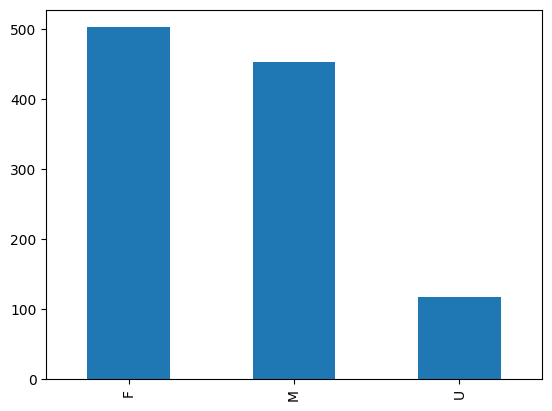

In [31]:
#Show a plot of the Gender breakdown.
import matplotlib.pyplot as plt
import seaborn as sns 
df_imputed["gender"].value_counts().plot(kind="bar")

<AxesSubplot: xlabel='state', ylabel='income'>

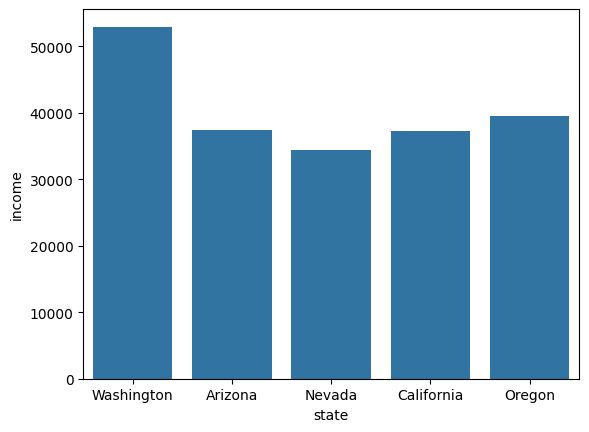

In [32]:
#Show a plot of Income by State.
sns.barplot(x="state", y ="income", data=df_imputed ,errorbar=None)

<AxesSubplot: xlabel='policy_type', ylabel='total_claim'>

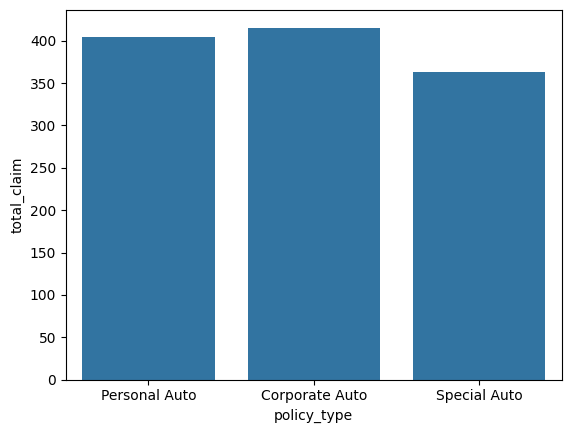

In [33]:
# Show a plot of the Policy Type by the Total Claim Amount.
sns.barplot(x="policy_type", y ="total_claim", data=df_imputed ,errorbar=None)

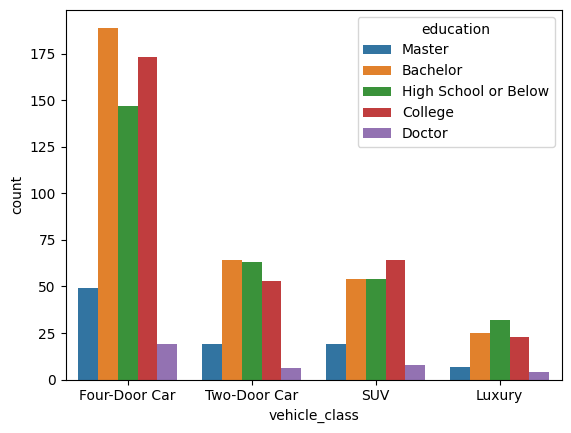

In [34]:
#Show a plot of the Education by Vehicle Class.
sns.countplot(x="vehicle_class", hue ="education", data = df_imputed)
plt.show()
#i finnally used a countplot after many attempts with the others ,but none of the convinced me as this one does.

### What insights can you establish from these plots?

* First gender plot ,just shows us there is a litlle number of unknow gender, and then slightly more females than males
* Sencond plot of income by state shows washinton having a better income average than the rest which are more equally distributed.
* Third plot of policy type by total claim shows that the type of policy is not highly correlated to the toal claim ammount,all present allmost the same total claim average
* The final plot first of all shows us that there way more four-door cars than two-door ,suvs or luxury cars
after that we can see a lower number of masters and doctor education type probably because there are just less people that have that grade
We can also see a similar amount of cars for the rest of education groups. 

# Lab | Customer Analysis Round 4

In [35]:
df_imputed

,customer_id,state,gender,education,customer_life_time_value,income,monthly_premium,open_complaints,policy_type,vehicle_class,total_claim
0,RB50392,Washington,U,Master,6306.604270,0.000000,1000.00000,0.0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,6979.535900,0.000000,94.00000,0.0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,12887.431700,48767.000000,108.00000,0.0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,7645.861800,0.000000,106.00000,0.0,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,5363.076500,36357.000000,68.00000,0.0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
1067,VJ51327,California,F,High School or Below,20314.997600,63209.000000,102.00000,2.0,Personal Auto,SUV,207.320041
1068,GS98873,Arizona,F,Bachelor,3239.124700,16061.000000,88.00000,0.0,Personal Auto,Four-Door Car,633.600000
1069,CW49887,California,F,Master,4626.801100,79487.000000,114.00000,0.0,Special Auto,SUV,547.200000
1070,MY31220,California,F,College,8997.040200,54230.000000,112.00000,0.0,Personal Auto,Two-Door Car,537.600000


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
#Check the data types of the columns. Get the numeric data into a dataframe
#called numerical and categorical columns in a dataframe called categorical
numerical_df = df_imputed.select_dtypes(include = np.number)
categorical_df = df_imputed.select_dtypes(include = object)

In [46]:
numerical_df

,customer_life_time_value,income,monthly_premium,total_claim
0,6306.604270,0.000000,1000.00000,2.704934
1,6979.535900,0.000000,94.00000,1131.464935
2,12887.431700,48767.000000,108.00000,566.472247
3,7645.861800,0.000000,106.00000,529.881344
4,5363.076500,36357.000000,68.00000,17.269323
...,...,...,...,...
1067,20314.997600,63209.000000,102.00000,207.320041
1068,3239.124700,16061.000000,88.00000,633.600000
1069,4626.801100,79487.000000,114.00000,547.200000
1070,8997.040200,54230.000000,112.00000,537.600000


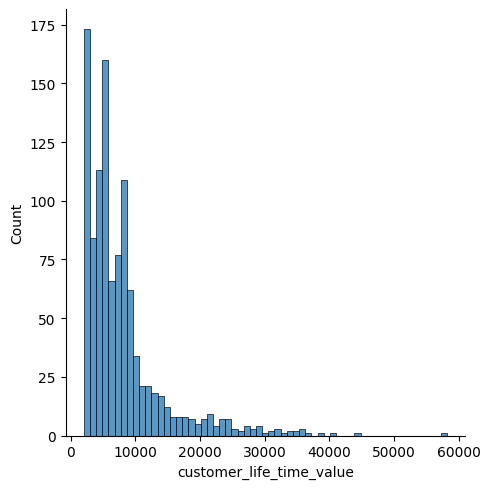

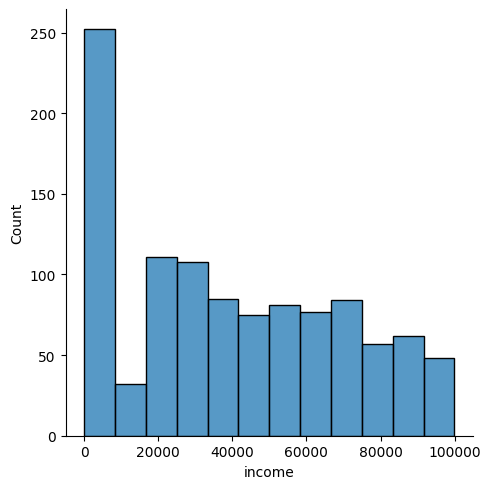

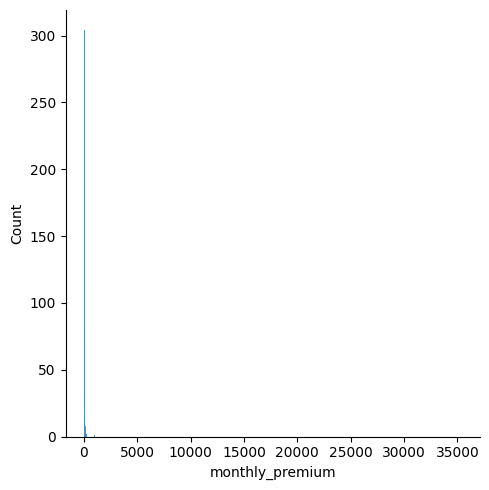

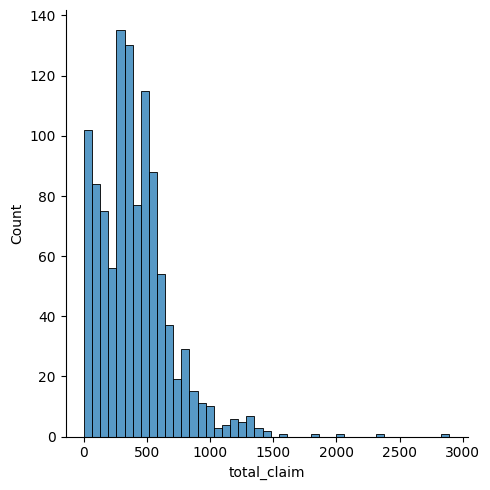

In [44]:
for col in numerical_df:
    sns.displot(numerical_df[col])

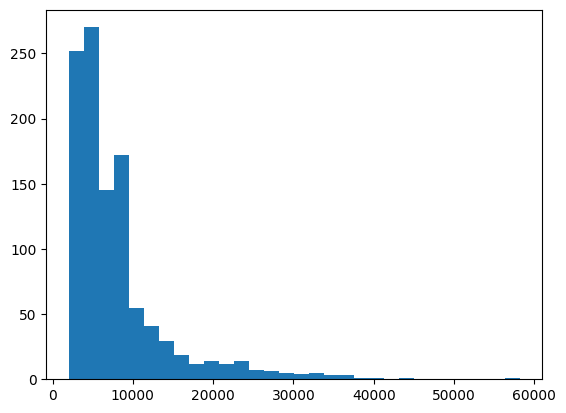

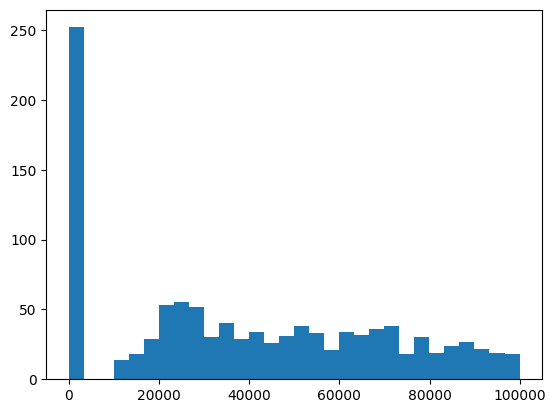

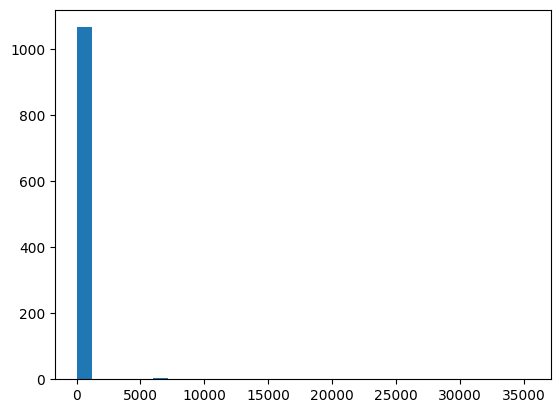

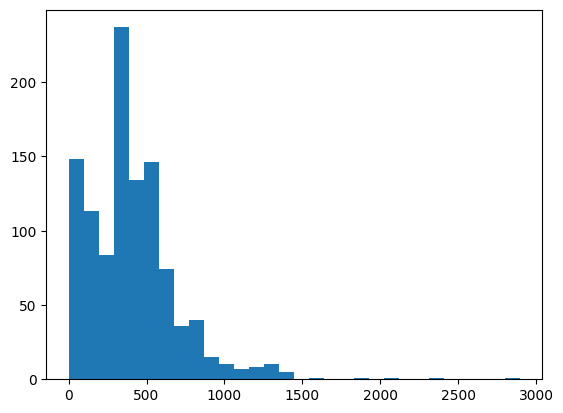

In [54]:
for col in numerical_df.columns :
    plt.figure()
    plt.hist(numerical_df[col],bins=30)

In [55]:
#Do the distributions for different numerical variables look like a normal distribution?

#it doesnt look like a normal distribution to me because some of them have pretty obvious outliers.

In [63]:
#For the numerical variables, check the multicollinearity between the features.
#Please note that we will use the column total_claim_amount later as the target variable.
correlations_matrix = numerical_df.corr()
correlations_matrix

,customer_life_time_value,income,monthly_premium,total_claim
customer_life_time_value,1.000000,0.041879,0.004909,0.131738
income,0.041879,1.000000,0.049100,-0.361282
monthly_premium,0.004909,0.049100,1.000000,-0.040493
total_claim,0.131738,-0.361282,-0.040493,1.000000


### Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

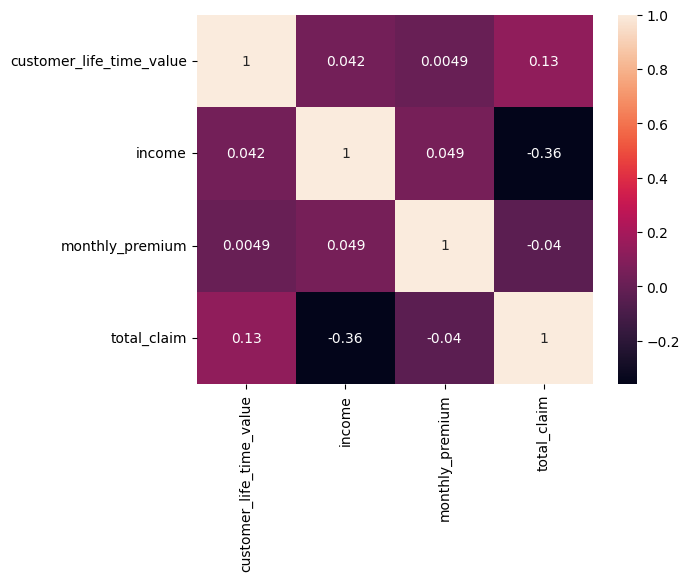

In [64]:
sns.heatmap(correlations_matrix, annot = True)
plt.show()

In [ ]:
# I do not see the need to drop values since none of them exceed 0.9 correlation,so i will keep them all

# Lab | Customer Analysis Round 5

In [71]:
#X-y split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
X=numerical_df.drop("total_claim",axis = 1) # let all the features in a dataframe
y = numerical_df["total_claim"] #isolate total_claim in a dataframe

X

,customer_life_time_value,income,monthly_premium
0,6306.604270,0.000000,1000.00000
1,6979.535900,0.000000,94.00000
2,12887.431700,48767.000000,108.00000
3,7645.861800,0.000000,106.00000
4,5363.076500,36357.000000,68.00000
...,...,...,...
1067,20314.997600,63209.000000,102.00000
1068,3239.124700,16061.000000,88.00000
1069,4626.801100,79487.000000,114.00000
1070,8997.040200,54230.000000,112.00000


In [72]:
y

0          2.704934
1       1131.464935
2        566.472247
3        529.881344
4         17.269323
           ...     
1067     207.320041
1068     633.600000
1069     547.200000
1070     537.600000
1071     404.986909
Name: total_claim, Length: 1072, dtype: float64

In [73]:

X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object) #not using it ,but putting there to get used to the convention
X_num

,customer_life_time_value,income,monthly_premium
0,6306.604270,0.000000,1000.00000
1,6979.535900,0.000000,94.00000
2,12887.431700,48767.000000,108.00000
3,7645.861800,0.000000,106.00000
4,5363.076500,36357.000000,68.00000
...,...,...,...
1067,20314.997600,63209.000000,102.00000
1068,3239.124700,16061.000000,88.00000
1069,4626.801100,79487.000000,114.00000
1070,8997.040200,54230.000000,112.00000


In [78]:
# Normalizing data with MinMaxScaler
transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)
x_normalized
normalized_df = pd.DataFrame(x_normalized, columns = X_num.columns)

(1072, 3)


C:\Users\Admin\AppData\Local\Temp\ipykernel_26116\4052985454.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_num[col], bins=30, kde=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_26116\4052985454.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normalized_df[col], bins=30, kde=True,

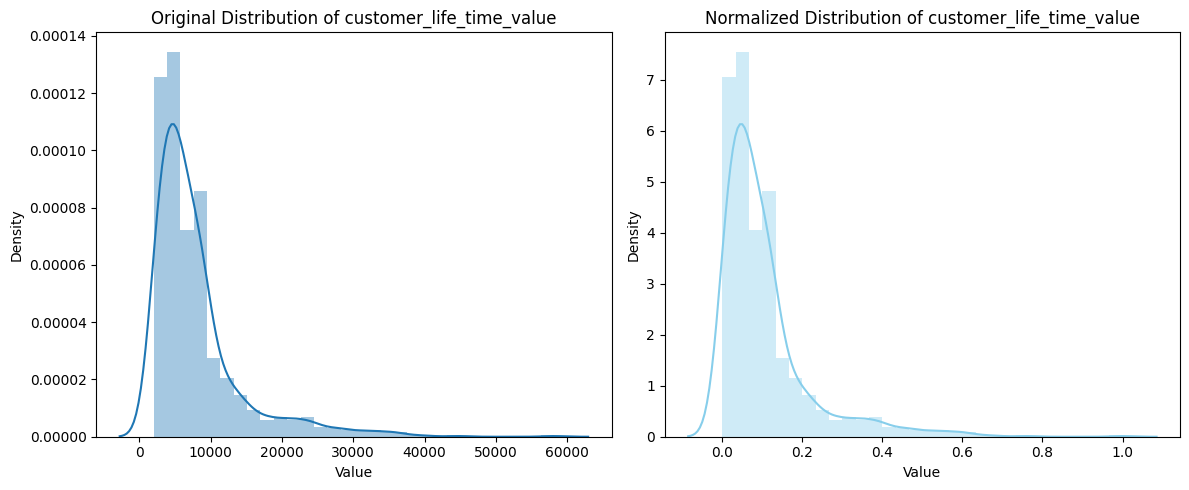

C:\Users\Admin\AppData\Local\Temp\ipykernel_26116\4052985454.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_num[col], bins=30, kde=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_26116\4052985454.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normalized_df[col], bins=30, kde=True,

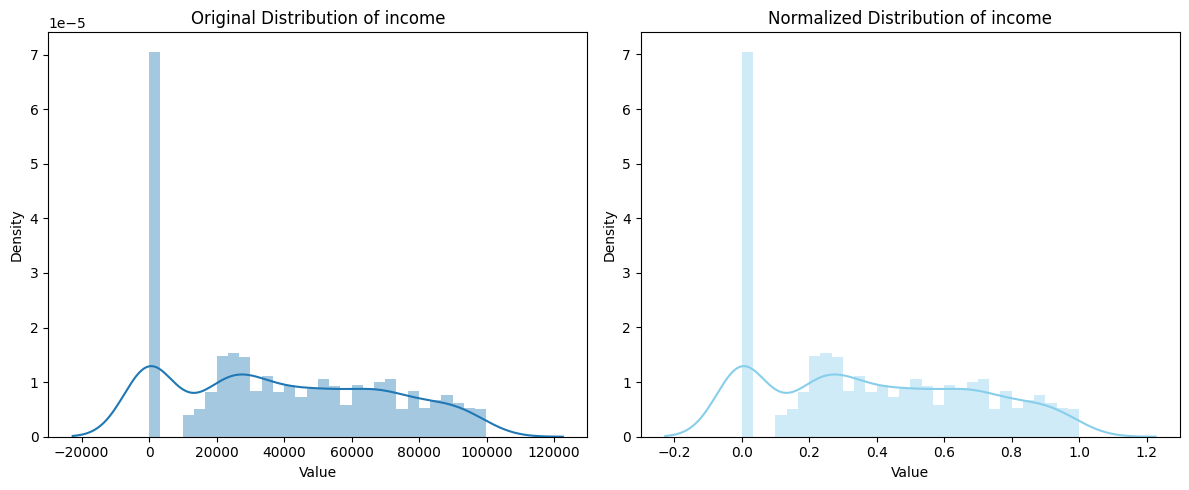

C:\Users\Admin\AppData\Local\Temp\ipykernel_26116\4052985454.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_num[col], bins=30, kde=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_26116\4052985454.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normalized_df[col], bins=30, kde=True,

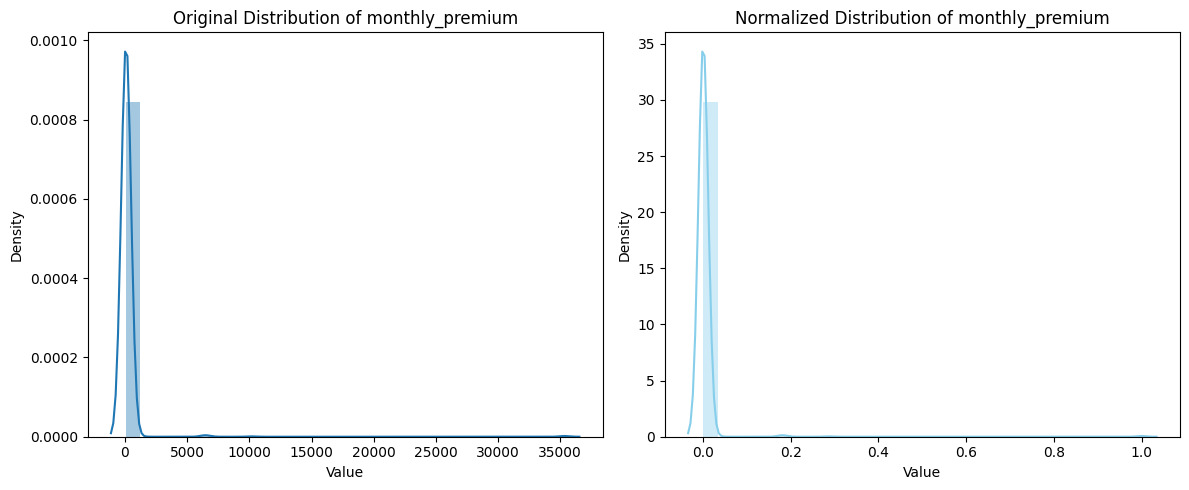

In [87]:
#trying to make a before and after efect ,but it only works with distplot so sorry for the warnings
for col in X_num.columns:
    plt.figure(figsize=(12, 5))
    
    # Original data distribution plot
    plt.subplot(1, 2, 1)
    sns.distplot(X_num[col], bins=30, kde=True)
    plt.title(f'Original Distribution of {col}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    
    # Normalized data distribution plot
    plt.subplot(1, 2, 2)
    sns.distplot(normalized_df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Normalized Distribution of {col}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    
    plt.tight_layout()
    plt.show()